# [Target Encoding](https://www.kaggle.com/code/ryanholbrook/target-encoding/tutorial) / Целево кодиране 
Boost any categorical feature with this powerful technique.

*Да усилим всяка категорийна характеристика с тази мощна техника.*

# Introduction #

Most of the techniques we've seen in this course have been for numerical features. The technique we'll look at in this lesson, *target encoding*, is instead meant for categorical features. It's a method of encoding categories as numbers, like one-hot or label encoding, with the difference that it also uses the *target* to create the encoding. This makes it what we call a **supervised** feature engineering technique.

*Повечето от техниките, които видяхме в този курс, бяха за числени характеристики. Техниката, която ще разгледаме в този урок, **целово кодиране**, вместо това е предназначена за категорични характеристики. Това е метод за кодиране на категории като числа, като `one-hot` или `label encoding`, с тази разлика, че използва и **target** за създаване на кодиране. Това го прави това, което ние наричаме техника за инженеринг на **наблюдавани/управлявани** характеристики.*

In [2]:

import pandas as pd

autos = pd.read_csv("../input/fe-course-data/autos.csv")
# autos = pd.read_csv(r"C:\Users\dobromir\kaggle\Feature Engineering\datasets\autos.csv")
autos

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


# Target Encoding #

A **target encoding** is any kind of encoding that replaces a feature's categories with some number derived from the target.

* **Целево кодиране** е всякакъв вид кодиране, което замества категориите на характеристика с някакво число, получено от целта.*

A simple and effective version is to apply a group aggregation with _**groupby()**_ and _**transform()**_ from Lesson 3, like the mean. Using the *Automobiles* dataset, this computes the average price of each vehicle's make:

*Прост и ефективен вариант е да се приложи групово агрегиране от урок 3, като средната стойност. Използвайки набора от данни *Automobiles*, това изчислява средната цена на всяка марка на автомобила:*

In [3]:
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

autos[["make", "price", "make_encoded"]].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


This kind of target encoding is sometimes called a **mean encoding**. Applied to a binary target, it's also called **bin counting**. (Other names you might come across include: likelihood encoding, impact encoding, and leave-one-out encoding.)

# Smoothing #

An encoding like this presents a couple of problems, however. First are *unknown categories*. Target encodings create a special risk of overfitting, which means they need to be trained on an independent "encoding" split. When you join the encoding to future splits, Pandas will fill in missing values for any categories not present in the encoding split. These missing values you would have to impute somehow.

*Кодиране като това обаче създава няколко проблема. **Първо** са *"неизвестните категории"*. Целевите 
кодировки създават специален риск от пренастройване(**overfitting**), което означава, че те трябва да 
бъдат обучени на независим сплит(подмножество) за "кодиране". Когато присъедините кодирането към бъдещи 
разделяния, Pandas ще попълни липсващите стойности за всички категории, които не присъстват в сплит за 
кодиране. Тези липсващи стойности ще трябва да запълните по някакъв начин.*

**Second** are *rare categories*. When a category only occurs a few times in the dataset, any statistics 
calculated on its group are unlikely to be very accurate. In the *Automobiles* dataset, the `mercurcy` 
make only occurs once. The "mean" price we calculated is just the price of that one vehicle, which might 
not be very representative of any Mercuries we might see in the future. Target encoding rare categories 
can make overfitting more likely.

*__Второ__ са *"редките категории"*. Когато дадена категория се среща само няколко пъти в набора от данни, 
всяка статистика, изчислена за нейната група, е малко вероятно да бъде много точна. В набора от данни 
*Automobiles* марката `mercurcy` се среща само веднъж. „Средната“ цена, която изчислихме, е само цената на 
това едно превозно средство, което може да не е много представително за "mercurcy", който може да видим в 
бъдеще. Целевото кодиране на редки категории може да направи пренастройването по-вероятно.*

A solution to these problems is to add **smoothing**. The idea is to blend the *in-category* average with 
the *overall* average. Rare categories get less weight on their category average, while missing categories 
just get the overall average.

*Решение на тези проблеми е добавянето на **изглаждане**. Идеята е да се смеси средната "в категорията" с 
"общата" средна стойност. Редките категории получават по-малка тежест от средната за категорията си, 
докато липсващите категории получават само общата средна стойност.*
In pseudocode:
```
encoding = weight * in_category + (1 - weight) * overall
```
where `weight` is a value between 0 and 1 calculated from the category frequency.

An easy way to determine the value for `weight` is to compute an **m-estimate**:
```
weight = n / (n + m)
```
where `n` is the total number of times that category occurs in the data. The parameter `m` determines the "smoothing factor". Larger values of `m` put more weight on the overall estimate.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/1uVtQEz.png" width=500, alt="">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

In the *Automobiles* dataset there are three cars with the make `chevrolet`. If you chose `m=2.0`, then the `chevrolet` category would be encoded with 60% of the average Chevrolet price plus 40% of the overall average price.
```
chevrolet = 0.6 * 6000.00 + 0.4 * 13285.03
```

When choosing a value for `m`, consider how noisy you expect the categories to be. Does the price of a vehicle vary a great deal within each make? Would you need a lot of data to get good estimates? If so, it could be better to choose a larger value for `m`; if the average price for each make were relatively stable, a smaller value could be okay.

*Когато избирате стойност за „m“, помислете колко разнородни очаквате да бъдат категориите. Цената на 
автомобила варира ли много в рамките на всяка марка? Имате ли нужда от много данни, за да получите добри 
оценки? Ако е така, би било по-добре да изберете по-голяма стойност за „m“; ако средната цена за всяка 
марка е относително стабилна, по-малка стойност може да е добре.*

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>Use Cases for Target Encoding / Случаи на употреба</strong><br> 
Target encoding is great for:
<ul>
<li><strong>High-cardinality features</strong>: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
    
<strong>Характеристика с голям брой категории</strong> *може да бъде трудна за кодиране: one-hot кодиране би генерирало твърде много характеристики и алтернативи, като кодиране на етикети, може да не са подходящи за тази характеристика. Целевото кодиране извлича числа за категориите, като използва най-важното свойство на характеристиката: нейната връзка с целта.*
<li><strong>Domain-motivated features</strong>: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.

<strong>Характеристики, мотивирани от домейн:</strong> *От предишен опит може да подозирате, че дадена категоийна характеристика трябва да е важна, дори ако е получила лош резултат с показател за функция. Целевото кодиране може да помогне да се разкрие истинската информативност на функцията.*
</ul>
</blockquote>

# Example - MovieLens1M #

The [*MovieLens1M*](https://www.kaggle.com/grouplens/movielens-20m-dataset) dataset contains one-million movie ratings by users of the MovieLens website, with features describing each user and movie. This hidden cell sets everything up:

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("../input/fe-course-data/movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
# print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))
print(f"Number of Unique Zipcodes: {df.Zipcode.nunique()}")


Number of Unique Zipcodes: 3439


With over 3000 categories, the `Zipcode` feature makes a good candidate for target encoding, and the size of this dataset (over one-million rows) means we can spare some data to create the encoding.

*С над 3000 категории характеристиката за "пощенски код" е добър кандидат за целево кодиране, а размерът на този набор от данни (над един милион реда) означава, че можем да спестим малко данни, за да създадем кодирането.*

We'll start by creating a 25% split to train the target encoder.

In [5]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]

# the rest 75% of the whole set
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]


In [6]:
# My
X_encode

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
254839,b'1218',1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'5603',50,1,6,b'02461'
821124,b'750',0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,b'3013',45,1,18,b'97124'
421137,b'3156',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'585',18,1,0,b'53703'
598954,b'223',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3114',18,1,3,b'65211'
325296,b'3074',0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,b'3622',18,1,0,b'02446'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77219,b'262',0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,b'4983',45,0,16,b'55116'
897261,b'1079',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'33',45,1,2,b'55421'
401228,b'1895',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
458023,b'1299',0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,b'981',25,1,21,b'02141'


In [7]:
# My
y_encode

254839    1
821124    4
421137    1
598954    5
325296    3
         ..
77219     5
897261    5
401228    3
458023    4
541428    3
Name: Rating, Length: 250052, dtype: uint8

In [8]:
# My
X_pretrain

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,b'22307'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,b'60073'
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,b'15217'
5,b'2042',0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,b'4957',25,1,1,b'48197'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000201,b'2762',0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'1934',25,1,18,b'95014'
1000203,b'2915',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3792',25,1,4,b'68108'
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,b'22032'
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,b'80916'


In [9]:
# My
y_train

1          4
2          1
3          5
4          4
5          2
          ..
1000201    3
1000203    4
1000205    1
1000206    5
1000208    3
Name: Rating, Length: 750157, dtype: uint8

In [10]:
# My
y, y.shape, X.shape

(0          5
 1          4
 2          1
 3          5
 4          4
           ..
 1000204    4
 1000205    1
 1000206    5
 1000207    3
 1000208    3
 Name: Rating, Length: 1000209, dtype: uint8,
 (1000209,),
 (1000209, 27))

The `category_encoders` package in `scikit-learn-contrib` implements an m-estimate encoder, which we'll use to encode our `Zipcode` feature.

In [11]:
y_encode.unique()  
# So we have five different occurances (n=5) in the "m-estimate" formula: weight = n / (n + m)

array([1, 4, 5, 3, 2], dtype=uint8)

In [12]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)
X_train

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,3.100059
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.461444
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,3.699198
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,3.865576
5,b'2042',0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,b'4957',25,1,1,3.243642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000201,b'2762',0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'1934',25,1,18,3.610131
1000203,b'2915',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3792',25,1,4,3.513014
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,3.844448
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,3.659318


Let's compare the encoded values to the target to see how informative our encoding might be.

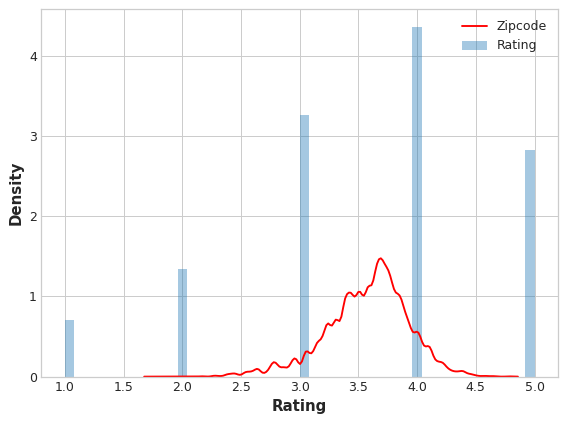

In [13]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);

The distribution of the encoded `Zipcode` feature roughly follows the distribution of the actual ratings, meaning that movie-watchers differed enough in their ratings from zipcode to zipcode that our target encoding was able to capture useful information.

# Your Turn #

[**Apply target encoding**](https://www.kaggle.com/kernels/fork/14393917) to features in *Ames* and investigate a surprising way that target encoding can lead to overfitting.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*